In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


In [85]:
column_names = ['no_threads','wall_time','elapsed_time', 'comparisons','scheduling']
results = pd.DataFrame(columns=column_names)

In [86]:
# read results of test0
count = 0
sequential_time = 0
scheduling = ''
with open('../outputs/somp_01.out', 'r') as output:
    line=output.readline()
    while line != '':
        line = output.readline()
        #find start of test result
        if (line.find('Starting searching sequential') >= 0):
            for i in range(0,11):
                line = output.readline()
                
            sequential_time = float(re.findall('\d+\.\d+', line)[0])
        

        if (line.find('Scheduling') >= 0):
            s = line.split(sep=' ')
            print(s)
            scheduling = s[len(s)-1].split('=')[1].split('\n')[0]
            
        if (line.find('Running') >= 0):
            threads = int(re.findall('\d+',line)[1])
            for i in range(1,5):
                line = output.readline()
            comparisons = int(re.findall('\d+', line)[0])
            
            for i in range(1,3):
                line = output.readline()
            
            wall_time = int(re.findall('\d+', line)[1])
            line = output.readline()
            cpu_time = float(re.findall('\d+\.\d+', line)[0])
            line = output.readline()
            
            
            new_row = {'no_threads' : threads,
                       'wall_time' : wall_time, 
                       'elapsed_time' : cpu_time,
                       'comparisons' : comparisons,
                       'scheduling' : scheduling}
            results = results.append(new_row, ignore_index=True)
            

['Start', 'Searching', 'Parallel', 'with', 'Scheduling=static\n']
['Start', 'Searching', 'Parallel', 'with', 'Scheduling=dynamic\n']
['Start', 'Searching', 'Parallel', 'with', 'Scheduling=guided\n']
['Start', 'Searching', 'Parallel', 'with', 'Scheduling=auto\n']


In [89]:
sequential_time
results['parallel_speedup'] = sequential_time / results['elapsed_time']
results['parallel_efficiency'] = results['parallel_speedup'] / results['no_threads']
results.head()
results.to_csv('../outputs/omp_0_results_test1.csv', index=False)

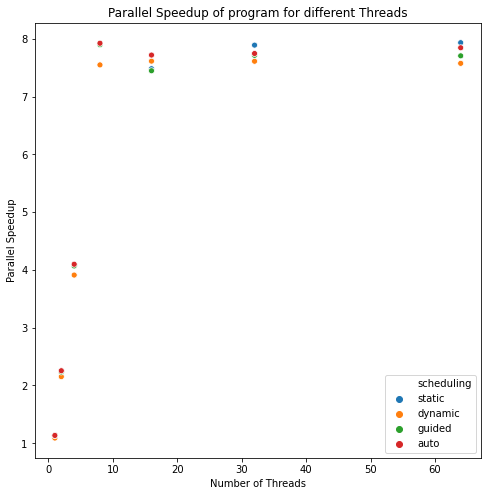

In [88]:
#x = 10 ** np.arange(2,10,2)
f, ax = plt.subplots(figsize=(8,8))


#ax.set_xticklabels(ss_output['product'].unique())
#sns.scatterplot(x=ss_output['product'],y=ss_output['cpu_time'],hue=ss_output['optimization'])

g = sns.scatterplot(x=results['no_threads'], y=results['parallel_speedup'], hue=results['scheduling'])
g.set_xlabel('Number of Threads')
g.set_ylabel('Parallel Speedup')
g.set_title('Parallel Speedup of program for different Threads')
ax.set_facecolor('white')
plt.savefig('../img/speedup_threads_8.png')
#ax.set(xscale='log')
#ax.set_xticks([0.2,0.4,0.6,0.8,1.0])
#ax.set_xticklabels(['10e+2','10e+4','10e+6','10e+8','10e+10'])

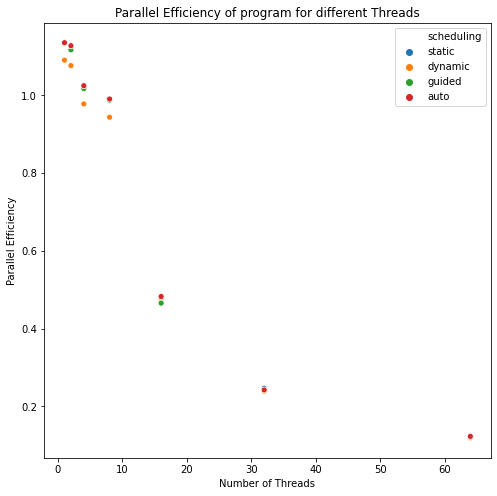

In [32]:
f, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(x=results['no_threads'], 
                    y=results['parallel_efficiency'],
                    hue=results['scheduling'])
g.set_xlabel('Number of Threads')
g.set_ylabel('Parallel Efficiency')
g.set_title('Parallel Efficiency of program for different Threads')
ax.set_facecolor('white')
plt.savefig('../img/efficiency_threads_8.png')

In [8]:
results.to_csv('../outputs/somp_0_results.csv',index=False,header=True)

In [2]:
sequential_comparisons = 0
sequential_cpu_time = 0

somp_2 = pd.DataFrame(columns=['program','comparisons','elapsed_cpu_time'])

with open('../outputs/somp_1.out', 'r') as output:
    line=output.readline()
    while line != '':
        line=output.readline()
        if (line.find('Starting test1 using searching_sequential') >= 0):
            for i in range(1,9):
                line=output.readline()
            program = 'sequential'
            sequential_comparisons = int(re.findall('\d+',line)[0])
            for i in range(1,4):
                line=output.readline()
            sequential_cpu_time = float(re.findall('\d+\.\d+', line)[0])
            somp_2 = somp_2.append({'program': program,
                                   'comparisons' : sequential_comparisons,
                                   'elapsed_cpu_time' : sequential_cpu_time},
                                    ignore_index=True)
        if (line.find('Searching test1 using searching_OMP_0') >= 0):
            for i in range(1,14):
                line=output.readline()
            program = 'OMP_0'
            comparisons = int(re.findall('\d+',line)[0])
            for i in range(1,4):
                line=output.readline()
            cpu_time = float(re.findall('\d+\.\d+', line)[0])
            somp_2 = somp_2.append({'program': program,
                       'comparisons' : comparisons,
                       'elapsed_cpu_time' : cpu_time}, ignore_index=True)
        if (line.find('Searching test1 using searching_OMP_1') >= 0):
            for i in range(1,14):
                line=output.readline()
            program = 'OMP_1'
            comparisons = int(re.findall('\d+',line)[0])
            for i in range(1,4):
                line=output.readline()
            cpu_time = float(re.findall('\d+\.\d+', line)[0])
            somp_2 = somp_2.append({'program': program,
                       'comparisons' : comparisons,
                       'elapsed_cpu_time' : cpu_time}, ignore_index=True)

In [3]:
somp_2.head()

,program,comparisons,elapsed_cpu_time
0,sequential,1002000,0.002964
1,OMP_0,9998501500,13.197240
2,OMP_1,1997289,0.012555


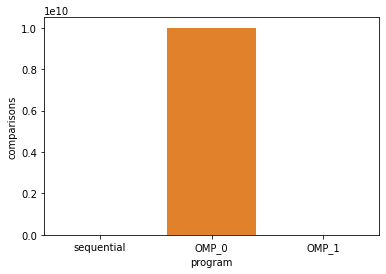

In [4]:

comp_plot = sns.barplot(x=somp_2['program'],y=somp_2['comparisons'])

In [21]:
# compare inital runs
initial = pd.DataFrame(columns=['comparisons','wall_time','elapsed_time'])
with open('../outputs/somp1_1.out', 'r') as output:
    line=output.readline()
    while line != '':
        line=output.readline()
        if (line.find('using 2 threads') >= 0):
            for i in range(0,4):
                line=output.readline()
            comparisons = int(re.findall('\d+',line)[0])
            for i in range(0,2):
                line=output.readline()
            wall_time = int(re.findall('\d+',line)[0])
            line=output.readline()
            elapsed_time = float(re.findall('\d+\.\d+', line)[0])
            initial = initial.append({'comparisons':comparisons,
                                     'wall_time':wall_time,
                                     'elapsed_time':elapsed_time},
                                    ignore_index=True)


1002288.4

In [24]:
comp = initial['comparisons'].mean()
wall = initial['wall_time'].mean()
elap = initial['elapsed_time'].mean()
print(f'Mean Comparisons = {comp}')
print(f'Mean Wall Time = {wall}')
print(f'Mean Elapsed Time = {elap}')

Mean Comparisons = 1002288.4
Mean Wall Time = 1.0
Mean Elapsed Time = 0.43913112969999996


In [35]:
# compare the validated results
validation = pd.DataFrame(columns=['scheduling','chunk_size','comparisons','wall_time','elapsed_time'])
with open('../outputs/somp1_2.out', 'r') as output:
    line=output.readline()
    while line != '':
        line=output.readline()
        if (line.find('scheduling.') >= 0):
            words = line.split(' ')
            scheduling = words[-2].split(',')[0]
            chunk_size = int(words[-2].split(',')[1])
            for i in range(0,13):
                line=output.readline()
            comparisons = int(re.findall('\d+',line)[0])
            for i in range(0,2):
                line=output.readline()
            wall_time = int(re.findall('\d+',line)[0])
            line=output.readline()
            elapsed_time = float(re.findall('\d+\.\d+', line)[0])
            validation = validation.append({'scheduling':scheduling,
                                            'chunk_size':chunk_size,
                                            'comparisons':comparisons,
                                            'wall_time':wall_time,
                                            'elapsed_time':elapsed_time},
                                           ignore_index=True)

In [46]:
#validation.info()
#validation.head()
for schedule in validation['scheduling'].unique():
    for chunk in validation['chunk_size'].unique():
        check1 = validation['scheduling'] == schedule
        check2 = validation['chunk_size'] == chunk
        c_min = validation[check1 & check2]['comparisons'].min()
        c_max = validation[check1 & check2]['comparisons'].max()
        c_avg = validation[check1 & check2]['comparisons'].mean()
        t_avg = validation[check1 & check2]['elapsed_time'].mean()
        print(f'Schedule: {schedule}\tchunks:{chunk}\t min:{c_min}\t max:{c_max}\t avg:{c_avg}\t avg T:{t_avg}')

Schedule: static	chunks:1	 min:1001560	 max:1006005	 avg:1003866.5	 avg T:0.0924011176
Schedule: static	chunks:2	 min:997219	 max:1003679	 avg:1001457.9	 avg T:0.051052324100000004
Schedule: static	chunks:4	 min:1000040	 max:1003338	 avg:1001373.6	 avg T:0.0294773293
Schedule: dynamic	chunks:1	 min:1002005	 max:1002778	 avg:1002433.8	 avg T:0.4200885658
Schedule: dynamic	chunks:2	 min:1002076	 max:1003980	 avg:1003025.7	 avg T:0.1882080778
Schedule: dynamic	chunks:4	 min:1000262	 max:1002892	 avg:1001298.3	 avg T:0.09271266500000001
Schedule: guided	chunks:1	 min:1998869	 max:2007521	 avg:2002637.5	 avg T:0.0124659091
Schedule: guided	chunks:2	 min:1997993	 max:2004427	 avg:2001808.3	 avg T:0.012477143899999998
Schedule: guided	chunks:4	 min:1995738	 max:2004427	 avg:2001093.2	 avg T:0.0126176669
Schedule: auto	chunks:1	 min:1999879	 max:2008253	 avg:2004142.3	 avg T:0.012550672799999999
Schedule: auto	chunks:2	 min:1999683	 max:2007543	 avg:2003287.6	 avg T:0.0124827158
Schedule: auto

(500000.0, 2500000.0)

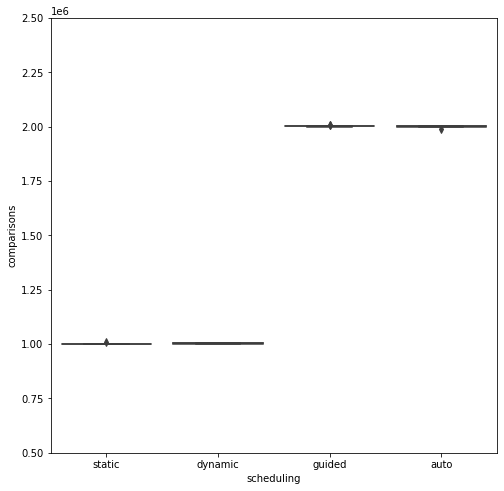

In [16]:
f,ax = plt.subplots(figsize=(8,8))

box = sns.boxplot(x=validation['scheduling'],y=validation['comparisons'])
plt.ylim(5e+5, 2.5e+6)

In [67]:
omp_1 = pd.DataFrame(columns=['threads','comparisons','wall_time','cpu_time'])
with open('../outputs/somp_2.out', 'r') as output:
    line=output.readline()
    program = ''
    while line != '':
        line=output.readline()
        if (line.find('Running Test') >= 0):
            thread = line.split(' ')[-2]
            for i in range(0,4):
                line=output.readline()
            comparisons = int(re.findall('\d+',line)[0])
            for i in range(0,2):
                line=output.readline()
            wall_time = int(re.findall('\d+',line)[1])
            
            line=output.readline()
            cpu_time = float(re.findall('\d+\.\d+', line)[0])
            omp_1 = omp_1.append({'threads':thread,
                                  'comparisons':comparisons,
                                  'wall_time':wall_time,
                                  'cpu_time':cpu_time},
                                 ignore_index=True)
            

In [72]:
omp_1.head()
omp_1.to_csv('../outputs/omp_1_test2.csv',index=False)

In [69]:
omp_2 = pd.DataFrame(columns=['threads','found_patterns','first_pattern','comparisons','wall_time','cpu_time'])
with open('../outputs/somp_2_1.out', 'r') as output:
    line=output.readline()
    program = ''
    while line != '':
        line=output.readline()
        if (line.find('Running Test') >= 0):
            thread = line.split(' ')[-2]
            for i in range(0,105):
                line=output.readline()
            found_patterns = int(re.findall('\d+',line)[0])
            for i in range(0,2):
                line=output.readline()
            first_pattern = int(re.findall('\d+',line)[0])
            line=output.readline()
            comparisons = int(re.findall('\d+',line)[0])
            for i in range(0,2):
                line=output.readline()
            wall_time = int(re.findall('\d+',line)[1])
            
            line=output.readline()
            cpu_time = float(re.findall('\d+\.\d+', line)[0])
            omp_2 = omp_2.append({'threads':thread,
                                  'found_patterns':found_patterns,
                                  'first_pattern':first_pattern,
                                  'comparisons':comparisons,
                                  'wall_time':wall_time,
                                  'cpu_time':cpu_time},
                                 ignore_index=True)

In [70]:
omp_2.head()

,threads,found_patterns,first_pattern,comparisons,wall_time,cpu_time
0,1,100,5001001,9949051000,26,26.820068
1,2,100,5001001,9949051000,13,13.741604
2,4,100,5001001,9949051000,7,7.522392
3,8,100,5001001,9949051000,7,7.573625
4,16,100,5001001,9949051000,7,7.509870


In [73]:
omp_2.to_csv('../outputs/omp_2_test2.csv',index=False)

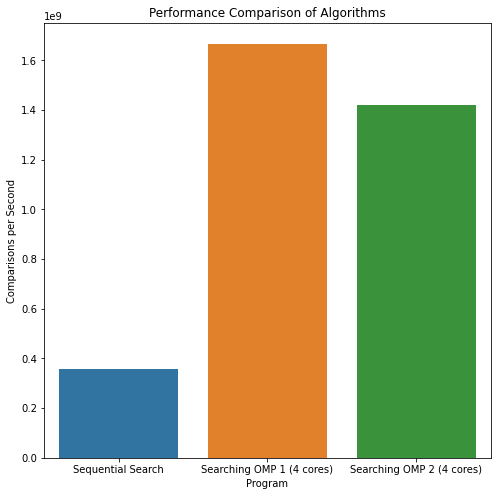

In [84]:
f, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x=['Sequential Search','Searching OMP 1 (4 cores)','Searching OMP 2 (4 cores)'],
               y = [5001002000/14,5001002462/3,9949051000/7])
g.set_xlabel('Program')
g.set_ylabel('Comparisons per Second')
g.set_title('Performance Comparison of Algorithms')
plt.savefig('../img/performance_comparison_test2.png')